In [1]:
# Step 0 - Import Libraries              ...........................
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
# Step 1 - Read the data                 ...........................
bikes = pd.read_csv('hour.csv')


In [3]:
bikes.head()

,index,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,demand
0,1,01-01-2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,01-01-2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,01-01-2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,01-01-2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,01-01-2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
# Step 2 - Prelim Analysis and Feature selection                  ........................
bikes_prep = bikes.copy()
bikes_prep = bikes_prep.drop(['index', 'date', 'casual', 'registered'], axis=1)
bikes_prep.head()

,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,demand
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [5]:
# Basic checks of missing values                    ...............................
bikes_prep.isnull().sum()

season        0
year          0
month         0
hour          0
holiday       0
weekday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
demand        0
dtype: int64

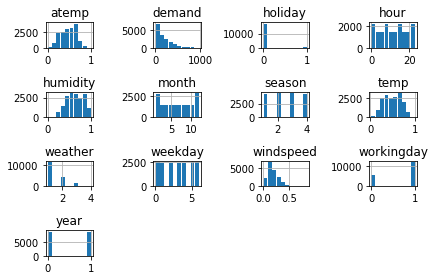

In [6]:
# Create pandas histogram
bikes_prep.hist(rwidth = 0.9)
plt.tight_layout()

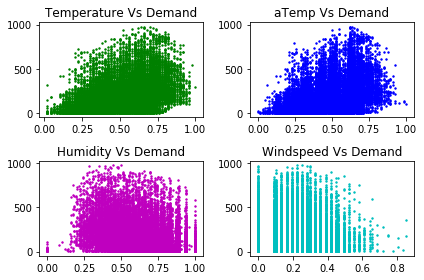

In [7]:
# ----------------------------------------------
# Step 3 - Data Visualisation
# ----------------------------------------------
#
# Visualise the continuous features Vs demand
plt.subplot(2,2,1)
plt.title('Temperature Vs Demand')
plt.scatter(bikes_prep['temp'], bikes_prep['demand'], s=2, c='g')

plt.subplot(2,2,2)
plt.title('aTemp Vs Demand')
plt.scatter(bikes_prep['atemp'], bikes_prep['demand'], s=2, c='b')

plt.subplot(2,2,3)
plt.title('Humidity Vs Demand')
plt.scatter(bikes_prep['humidity'], bikes_prep['demand'], s=2, c='m')

plt.subplot(2,2,4)
plt.title('Windspeed Vs Demand')
plt.scatter(bikes_prep['windspeed'], bikes_prep['demand'], s=2, c='c')

plt.tight_layout()


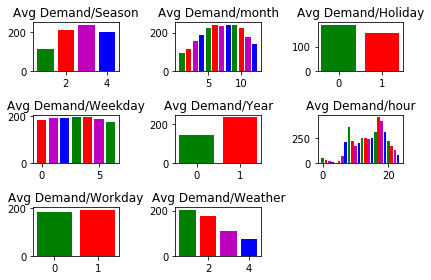

In [8]:
# Visualise the categorical features
colors = ['g', 'r', 'm', 'b']
# Average Demand V/S Each Categorical Variable
plt.subplot(3,3,1)
plt.title('Avg Demand/Season')
cat_list = bikes_prep['season'].unique()
cat_average = bikes_prep.groupby('season').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

plt.subplot(3,3,2)
plt.title('Avg Demand/month')
cat_list = bikes_prep['month'].unique()
cat_average = bikes_prep.groupby('month').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

plt.subplot(3,3,3)
plt.title('Avg Demand/Holiday')
cat_list = bikes_prep['holiday'].unique()
cat_average = bikes_prep.groupby('holiday').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

plt.subplot(3,3,4)
plt.title('Avg Demand/Weekday')
cat_list = bikes_prep['weekday'].unique()
cat_average = bikes_prep.groupby('weekday').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

plt.subplot(3,3,5)
plt.title('Avg Demand/Year')
cat_list = bikes_prep['year'].unique()
cat_average = bikes_prep.groupby('year').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

plt.subplot(3,3,6)
plt.title('Avg Demand/hour')
cat_list = bikes_prep['hour'].unique()
cat_average = bikes_prep.groupby('hour').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

plt.subplot(3,3,7)
plt.title('Avg Demand/Workday')
cat_list = bikes_prep['workingday'].unique()
cat_average = bikes_prep.groupby('workingday').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

plt.subplot(3,3,8)
plt.title('Avg Demand/Weather')
cat_list = bikes_prep['weather'].unique()
cat_average = bikes_prep.groupby('weather').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

plt.tight_layout()


<BarContainer object of 24 artists>

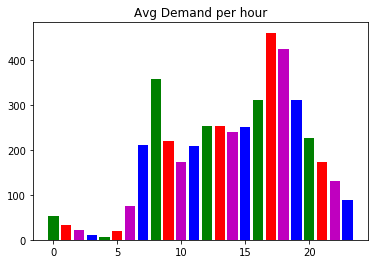

In [9]:
plt.title('Avg Demand per hour')
cat_list = bikes_prep['hour'].unique()
cat_average = bikes_prep.groupby('hour').mean()['demand']
plt.bar(cat_list, cat_average, color=colors)

In [10]:
# Check for outliers

#bikes_prep['demand'].describe()

#bikes_prep['demand'].quantile([0.05, 0.1, 0.15, 0.9, 0.95, 0.99])


In [11]:
# ------------------------------------------------------
# Step 4 - Check Multiple Linear Regression Assumptions
# ------------------------------------------------------

# Linearity using correlation coefficient matrix using corr
#correlation = bikes_prep[['temp', 'atemp', 'humidity', 'windspeed', 'demand']].corr()
#print(correlation)      

In [10]:
# Step 5 - Drop irrelevant features                        ..............................
bikes_prep = bikes_prep.drop(['weekday', 'year', 'workingday', 'atemp', 'windspeed'], axis=1)
bikes_prep.head()

,season,month,hour,holiday,weather,temp,humidity,demand
0,1,1,0,0,1,0.24,0.81,16
1,1,1,1,0,1,0.22,0.80,40
2,1,1,2,0,1,0.22,0.80,32
3,1,1,3,0,1,0.24,0.75,13
4,1,1,4,0,1,0.24,0.75,1


In [13]:
# Autocorrelation of demand using acor
#dff1 = pd.to_numeric(bikes_prep['demand'], downcast='float')
#plt.acorr(dff1, maxlags=12)

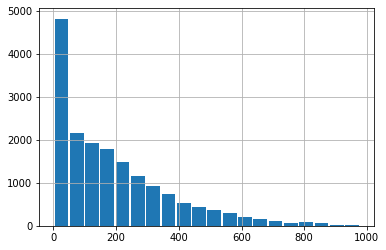

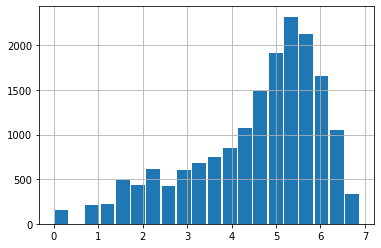

In [11]:

# ------------------------------------------------------
# Step 6 - Create/Modify new features
# ------------------------------------------------------
# Log Normalise the feature 'Demand'                     ..............................
df1 = bikes_prep['demand']
df2 = np.log(df1)

plt.figure()
df1.hist(rwidth=0.9, bins=20)

plt.figure()
df2.hist(rwidth=0.9, bins=20)

bikes_prep['demand'] = np.log(bikes_prep['demand'])

In [15]:
# Solve the problem of Autocorrelation
# Shift the demand by 3 lags

#t_1 = bikes_prep['demand'].shift(+1).to_frame()
#t_1.columns = ['t-1']

#t_2 = bikes_prep['demand'].shift(+2).to_frame()
#t_2.columns = ['t-2']

#t_3 = bikes_prep['demand'].shift(+3).to_frame()
#t_3.columns = ['t-3']

#bikes_prep_lag = pd.concat([bikes_prep, t_1, t_2, t_3], axis=1)

#bikes_prep_lag = bikes_prep_lag.dropna()
#bikes_prep_lag.head()

In [12]:
# -----------------------------------------------------------------------------
# Step 7 - Create Dummy Variables and drop first to avoid dummy variables trap
# -----------------------------------------------------------------------------
# - season
# - holiday
# - weather
# - month
# - hour
#
# Using get_dummies
#
bikes_prep.dtypes

bikes_prep['season'] = bikes_prep['season'].astype('category')
bikes_prep['holiday'] = bikes_prep['holiday'].astype('category')
bikes_prep['weather'] = bikes_prep['weather'].astype('category')
bikes_prep['month'] = bikes_prep['month'].astype('category')
bikes_prep['hour'] = bikes_prep['hour'].astype('category')

bikes_prep = pd.get_dummies(bikes_prep, drop_first=True)
bikes_prep.shape


(17379, 44)

In [13]:
# ----------------------------------------------------------
# Step 8 - Create Train and test split
# ----------------------------------------------------------

# Split the X and Y dataset into training and testing set
#
#      from sklearn.model_selection import train_test_split
#      X_train, X_test, Y_train, Y_test = \
#      train_test_split(X, Y, test_size = 0.4, random_state = 1234)
#
# Demand is time-series type of data

Y = bikes_prep[['demand']]
X = bikes_prep.drop(['demand'], axis=1)

tr_size = 0.7 * len(X)
tr_size = int(tr_size)

X_train = X.values[0 : tr_size]
X_test = X.values[tr_size : len(X)]

Y_train = Y.values[0 : tr_size]
Y_test = Y.values[tr_size : len(Y)]

In [14]:
# ----------------------------------------------------------
# Step 9 - Fit and Score the model
# ----------------------------------------------------------
# Linear Regression
from sklearn.linear_model import LinearRegression

std_reg = LinearRegression()
std_reg.fit(X_train, Y_train)

r2_train = std_reg.score(X_train, Y_train)
r2_test  = std_reg.score(X_test, Y_test)


# Create Y Predictions
Y_predict = std_reg.predict(X_test)


In [15]:

# Calculate RMSLE and compare results
# Exponent opposite to log

Y_test_e = []
Y_predict_e = []

for i in range(0, len(Y_test)):
    Y_test_e.append(math.exp(Y_test[i]))
    Y_predict_e.append(math.exp(Y_predict[i]))

log_sq_sum = 0.0

for i in range(0, len(Y_test_e)):
    log_a = math.log(Y_test_e[i] + 1)
    log_p = math.log(Y_predict_e[i] + 1)
    log_diff = (log_p - log_a)**2
    log_sq_sum = log_sq_sum + log_diff

rmsle = math.sqrt(log_sq_sum/len(Y_test))

print(rmsle)

0.7021935281382394


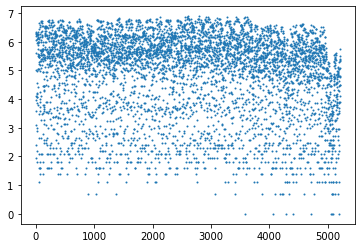

In [21]:
plt.scatter(range(len(Y_test)),Y_test,s = 1)
plt.show()

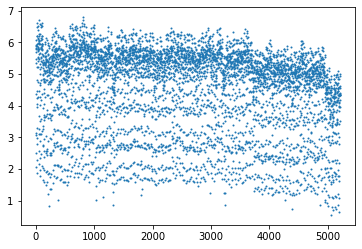

In [22]:
plt.scatter(range(len(Y_test)),Y_predict,s=1)
plt.show()

In [19]:
# Training with best parameters
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
model = dtr.fit(X_train,Y_train)
Y1_pred = model.predict(X_test)
#print(X_test)
from sklearn.metrics import mean_squared_log_error
msle=mean_squared_log_error(Y1_pred,Y_test)
rmsle=np.sqrt(msle)
print('RMLSE for the data:',rmsle) # For decision tree


RMLSE for the data: 0.23314903799838


In [27]:
X_test.shape

(5214, 43)

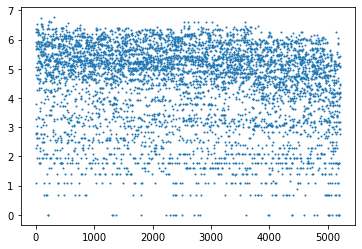

In [23]:
plt.scatter(range(len(Y_test)),Y1_pred,s=1)
plt.show()

In [24]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()
model = RF.fit(X_train,Y_train)
Y2_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_log_error
msle=mean_squared_log_error(Y2_pred,Y_test)
rmsle=np.sqrt(msle)
print('RMLSE for the data:',rmsle) # For random forest

C:\Users\Acer\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RMLSE for the data: 0.1675630364222136


In [22]:
#print(np.floor(model.predict([[22,12,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0]])))

[5.]


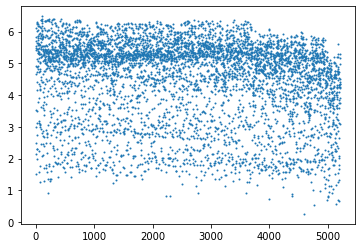

In [26]:
plt.scatter(range(len(Y_test)),Y2_pred,s=1)
plt.show()

In [28]:
from sklearn.ensemble import AdaBoostRegressor
ab_rf = AdaBoostRegressor()
model = ab_rf.fit(X_train,Y_train)
Y3_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_log_error
msle=mean_squared_log_error(Y3_pred,Y_test)
rmsle=np.sqrt(msle)
print('RMLSE for the data:',rmsle) # For Ada-Boost

C:\Users\Acer\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RMLSE for the data: 0.23840893504541621


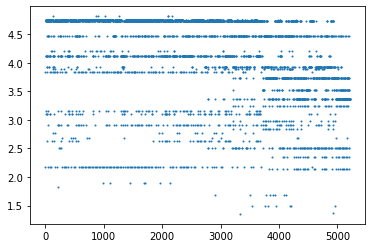

In [32]:
plt.scatter(range(len(Y_test)),Y3_pred , s=1)
plt.show()